In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve


from tensorflow import keras
from keras.models import Sequential # sequential networks= all the layers are one after the others
from keras.layers import Dense # we have flat layes 
from scikeras.wrappers import KerasClassifier

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1
from keras.layers import Dropout
from keras.models import load_model

In [4]:
#Read datasets
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

#Drop useless features
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

#LabelEncode categorical features
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in c:
    df_train[i]=le.fit_transform(df_train[i])

for i in c:
    df_test[i]=le.fit_transform(df_test[i])

#Normalize pure numeric features 
scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features
scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test

#Set X_train,y_train = data to fit models. Set X_test,y_test = data to test models.
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

In [25]:
n_classes = 8
def build_model1():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(64, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model2():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='tanh')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model3():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='tanh')) 
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model4():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(512, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

In [114]:
clf1=KerasClassifier(build_fn=build_model1)
clf2=KerasClassifier(build_fn=build_model2)
clf3=KerasClassifier(build_fn=build_model3)
clf4=KerasClassifier(build_fn=build_model4)

print("Train Model1")
history1=clf1.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_
print("Train Model2")
history2=clf2.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_
print("Train Model3")
history3=clf3.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_
print("Train Model4")
history4=clf4.fit(X_train, y_train,validation_split=0.1,epochs=50, batch_size=30).history_

Train Model1
Epoch 1/50


d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 3ms/step - loss: 1.6106 - accuracy: 0.3842 - val_loss: 1.5505 - val_accuracy: 0.3989
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 1.0377 - accuracy: 0.6219 - val_loss: 1.6422 - val_accuracy: 0.4372
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 0.7562 - accuracy: 0.7325 - val_loss: 1.7185 - val_accuracy: 0.4536
Epoch 4/50
55/55 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.8067 - val_loss: 1.8429 - val_accuracy: 0.4699
Epoch 5/50
55/55 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8748 - val_loss: 1.9196 - val_accuracy: 0.4426
Epoch 6/50
55/55 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8900 - val_loss: 2.0527 - val_accuracy: 0.4372
Epoch 7/50
55/55 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.9331 - val_loss: 2.1329 - val_accuracy: 0.4262
Epoch 8/50
55/55 [=============

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 3ms/step - loss: 1.6816 - accuracy: 0.3422 - val_loss: 1.6521 - val_accuracy: 0.3497
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 1.2543 - accuracy: 0.5277 - val_loss: 1.5999 - val_accuracy: 0.4590
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 1.0021 - accuracy: 0.6152 - val_loss: 1.6302 - val_accuracy: 0.4262
Epoch 4/50
55/55 [==============================] - 0s 1ms/step - loss: 0.7840 - accuracy: 0.7173 - val_loss: 1.8280 - val_accuracy: 0.3825
Epoch 5/50
55/55 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7605 - val_loss: 1.8800 - val_accuracy: 0.4098
Epoch 6/50
55/55 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.8073 - val_loss: 2.0314 - val_accuracy: 0.4317
Epoch 7/50
55/55 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8535 - val_loss: 2.1004 - val_accuracy: 0.4536
Epoch 8/50
55/55 [=============

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 4ms/step - loss: 2.0143 - accuracy: 0.1550 - val_loss: 1.9854 - val_accuracy: 0.1639
Epoch 2/50
55/55 [==============================] - 0s 1ms/step - loss: 1.7365 - accuracy: 0.3252 - val_loss: 1.8240 - val_accuracy: 0.3169
Epoch 3/50
55/55 [==============================] - 0s 1ms/step - loss: 1.4405 - accuracy: 0.4286 - val_loss: 1.7357 - val_accuracy: 0.3169
Epoch 4/50
55/55 [==============================] - 0s 1ms/step - loss: 1.2505 - accuracy: 0.5125 - val_loss: 1.6883 - val_accuracy: 0.3770
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 1.1784 - accuracy: 0.5343 - val_loss: 1.8797 - val_accuracy: 0.3552
Epoch 6/50
55/55 [==============================] - 0s 1ms/step - loss: 1.0236 - accuracy: 0.6036 - val_loss: 2.0277 - val_accuracy: 0.3880
Epoch 7/50
55/55 [==============================] - 0s 1ms/step - loss: 0.9060 - accuracy: 0.6498 - val_loss: 1.9688 - val_accuracy: 0.4098
Epoch 8/50
55/55 [=============

d:\Anaconda\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


55/55 [==============================] - 1s 4ms/step - loss: 1.5824 - accuracy: 0.3982 - val_loss: 1.5749 - val_accuracy: 0.4153
Epoch 2/50
55/55 [==============================] - 0s 3ms/step - loss: 0.9351 - accuracy: 0.6547 - val_loss: 1.8809 - val_accuracy: 0.3770
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.7562 - val_loss: 1.8431 - val_accuracy: 0.4372
Epoch 4/50
55/55 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8261 - val_loss: 2.1196 - val_accuracy: 0.4317
Epoch 5/50
55/55 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8809 - val_loss: 2.3232 - val_accuracy: 0.4153
Epoch 6/50
55/55 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.9240 - val_loss: 2.4170 - val_accuracy: 0.4044
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9422 - val_loss: 2.6319 - val_accuracy: 0.4208
Epoch 8/50
55/55 [=============

In [115]:
y_pred1=clf1.predict(X_test).astype(int)
print(classification_report(y_test, y_pred1))

20/20 [==============================] - 0s 553us/step
              precision    recall  f1-score   support

           0       0.53      0.79      0.63        96
           1       0.57      0.60      0.59        96
           2       0.48      0.54      0.51        48
           3       0.62      0.44      0.51        96
           4       0.45      0.46      0.45        96
           5       0.37      0.38      0.37        48
           6       0.40      0.31      0.35        96
           7       0.49      0.35      0.41        48

    accuracy                           0.50       624
   macro avg       0.49      0.48      0.48       624
weighted avg       0.50      0.50      0.49       624



In [116]:
y_pred2=clf2.predict(X_test).astype(int)
print(classification_report(y_test, y_pred2))

20/20 [==============================] - 0s 606us/step
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        96
           1       0.57      0.65      0.60        96
           2       0.44      0.56      0.50        48
           3       0.57      0.42      0.48        96
           4       0.39      0.35      0.37        96
           5       0.42      0.46      0.44        48
           6       0.39      0.24      0.30        96
           7       0.53      0.50      0.52        48

    accuracy                           0.50       624
   macro avg       0.48      0.50      0.48       624
weighted avg       0.49      0.50      0.48       624



In [117]:
y_pred3=clf3.predict(X_test).astype(int)
print(classification_report(y_test, y_pred3))

20/20 [==============================] - 0s 606us/step
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        96
           1       0.57      0.65      0.60        96
           2       0.50      0.60      0.55        48
           3       0.62      0.36      0.46        96
           4       0.42      0.44      0.43        96
           5       0.38      0.42      0.40        48
           6       0.39      0.28      0.33        96
           7       0.40      0.40      0.40        48

    accuracy                           0.50       624
   macro avg       0.48      0.49      0.48       624
weighted avg       0.50      0.50      0.49       624



In [118]:
y_pred4=clf4.predict(X_test).astype(int)
print(classification_report(y_test, y_pred4))

20/20 [==============================] - 0s 685us/step
              precision    recall  f1-score   support

           0       0.51      0.78      0.62        96
           1       0.56      0.64      0.60        96
           2       0.55      0.54      0.55        48
           3       0.63      0.38      0.47        96
           4       0.43      0.44      0.44        96
           5       0.41      0.42      0.41        48
           6       0.43      0.33      0.38        96
           7       0.56      0.52      0.54        48

    accuracy                           0.51       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.51      0.51      0.50       624



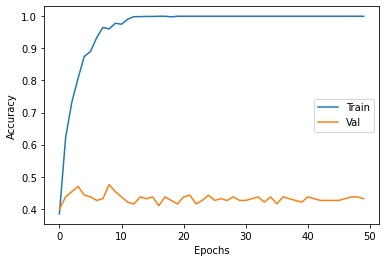

In [119]:
plt.plot(history1['accuracy'], label='Train')
plt.plot(history1['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

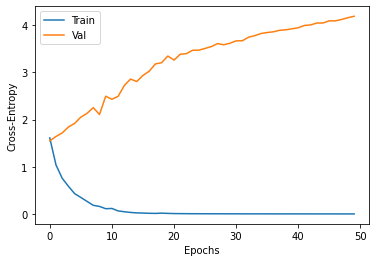

In [120]:
plt.plot(history1['loss'], label='Train')
plt.plot(history1['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

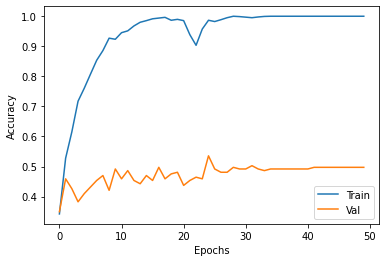

In [121]:
plt.plot(history2['accuracy'], label='Train')
plt.plot(history2['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

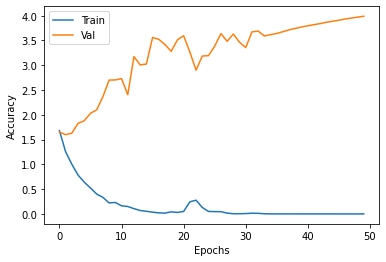

In [122]:
plt.plot(history2['loss'], label='Train')
plt.plot(history2['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

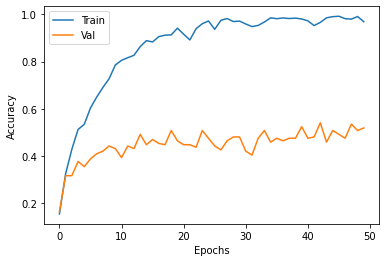

In [123]:
plt.plot(history3['accuracy'], label='Train')
plt.plot(history3['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

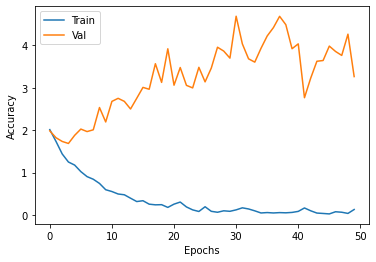

In [124]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

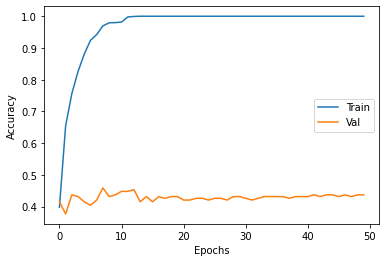

In [125]:
plt.plot(history4['accuracy'], label='Train')
plt.plot(history4['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

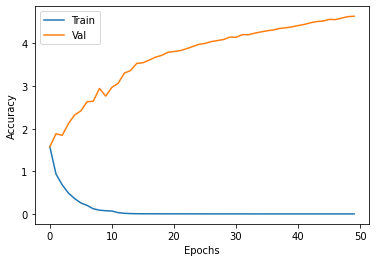

In [126]:
plt.plot(history4['loss'], label='Train')
plt.plot(history4['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Early stopping condition

In [127]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1
from keras.layers import Dropout

In [129]:
es = EarlyStopping(monitor='val_loss', patience=50, verbose=True) # tipycal monitor is val_loss to avoid overfitting. patience says that: if after 50 epochs the val loss is not decrsing anymore u can stop and return the model as the best model
mc = ModelCheckpoint('best_model_NOREG.h1', monitor='val_loss', save_best_only=True) # modelcheckpoint is another class to specify the name of the model, save best only true -> automatically deletes all the other model that are not the best

clf = KerasClassifier(build_model4, callbacks=[es, mc])
clf.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
46/46 [==============================] - ETA: 0s - loss: 1.5706 - accuracy: 0.4063

INFO:tensorflow:Assets written to: best_model_NOREG.h1\assets


INFO:tensorflow:Assets written to: best_model_NOREG.h1\assets


46/46 [==============================] - 1s 23ms/step - loss: 1.5706 - accuracy: 0.4063 - val_loss: 1.5195 - val_accuracy: 0.4426
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 0.9237 - accuracy: 0.6689 - val_loss: 1.6701 - val_accuracy: 0.4153
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.7613 - val_loss: 2.0690 - val_accuracy: 0.4016
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8372 - val_loss: 2.1119 - val_accuracy: 0.4262
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8967 - val_loss: 2.1315 - val_accuracy: 0.4536
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9473 - val_loss: 2.5433 - val_accuracy: 0.4208
Epoch 7/500
46/46 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9514 - val_loss: 2.4612 - val_accuracy: 0.4536
Epoch 8/500
46/46 [=====

KerasClassifier(
	model=<function build_model4 at 0x000001990FFB3160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000001991CFCED60>, <keras.callbacks.ModelCheckpoint object at 0x0000019924381640>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [130]:
# we can see that that the training stopped after 31 epochs without reachng the end

y_pred = clf.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 658us/step
Accuracy 0.5048076923076923
F1-score [0.60580913 0.60913706 0.54716981 0.46979866 0.43386243 0.3960396
 0.4        0.48888889]
              precision    recall  f1-score   support

           0       0.50      0.76      0.61        96
           1       0.59      0.62      0.61        96
           2       0.50      0.60      0.55        48
           3       0.66      0.36      0.47        96
           4       0.44      0.43      0.43        96
           5       0.38      0.42      0.40        48
           6       0.44      0.36      0.40        96
           7       0.52      0.46      0.49        48

    accuracy                           0.50       624
   macro avg       0.51      0.50      0.49       624
weighted avg       0.51      0.50      0.50       624



L2 regularization

In [132]:
from keras.regularizers import l2, l1

def build_L2_model4():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu',kernel_regularizer=l2(0.001))) 
    model.add(Dense(512, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

In [133]:
mc = ModelCheckpoint('best_model_L2.h1', monitor='val_loss', save_best_only=True)

L2_model = KerasClassifier(build_L2_model4, callbacks=[es,mc])
L2_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
24/46 [==============>...............] - ETA: 0s - loss: 2.0162 - accuracy: 0.3646 

INFO:tensorflow:Assets written to: best_model_L2.h1\assets


INFO:tensorflow:Assets written to: best_model_L2.h1\assets


46/46 [==============================] - 1s 17ms/step - loss: 1.8824 - accuracy: 0.4179 - val_loss: 2.0224 - val_accuracy: 0.3798
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 1.2832 - accuracy: 0.6491 - val_loss: 2.2713 - val_accuracy: 0.3388
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.7565 - val_loss: 2.1461 - val_accuracy: 0.4180
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 0.7931 - accuracy: 0.8304 - val_loss: 2.5337 - val_accuracy: 0.4044
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.8789 - val_loss: 2.6146 - val_accuracy: 0.4317
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.9166 - val_loss: 2.8124 - val_accuracy: 0.4098
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.9364 - val_loss: 2.9739 - val_accuracy: 0.4044
Epoch 8/500
46/46 [=====

KerasClassifier(
	model=<function build_L2_model4 at 0x00000199282D33A0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000001991CFCED60>, <keras.callbacks.ModelCheckpoint object at 0x00000199280C4310>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

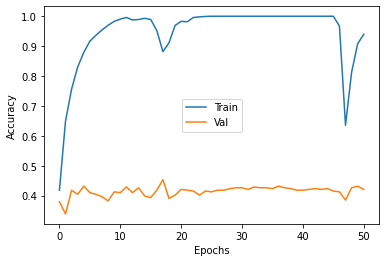

In [134]:
history = L2_model.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

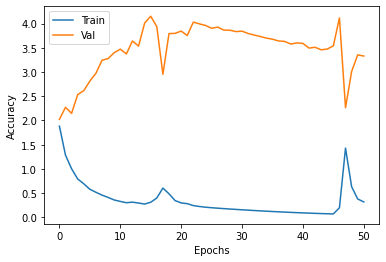

In [135]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Dropout

In [136]:
def build_DROPOUT_model4():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(512, activation='relu'))# second layer
    model.add(Dropout(0.1))# between these levels, for each iteration, 10% weight connection are put to 0
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

In [137]:
mc = ModelCheckpoint('best_model_DROPOUT.h1', monitor='val_loss', save_best_only=True)

DROPOUT_model = KerasClassifier(build_DROPOUT_model4, callbacks=[es,mc])
DROPOUT_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
46/46 [==============================] - ETA: 0s - loss: 1.5461 - accuracy: 0.4138

INFO:tensorflow:Assets written to: best_model_DROPOUT.h1\assets


INFO:tensorflow:Assets written to: best_model_DROPOUT.h1\assets


46/46 [==============================] - 2s 18ms/step - loss: 1.5461 - accuracy: 0.4138 - val_loss: 1.5659 - val_accuracy: 0.4344
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 0.9883 - accuracy: 0.6170 - val_loss: 1.7546 - val_accuracy: 0.4016
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.7633 - val_loss: 2.0149 - val_accuracy: 0.3989
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.8427 - val_loss: 2.0541 - val_accuracy: 0.4098
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8817 - val_loss: 2.3546 - val_accuracy: 0.4071
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9275 - val_loss: 3.0816 - val_accuracy: 0.3716
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 0.1890 - accuracy: 0.9480 - val_loss: 2.7486 - val_accuracy: 0.4426
Epoch 8/500
46/46 [=====

KerasClassifier(
	model=<function build_DROPOUT_model4 at 0x0000019928356550>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000001991CFCED60>, <keras.callbacks.ModelCheckpoint object at 0x00000199199EC700>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

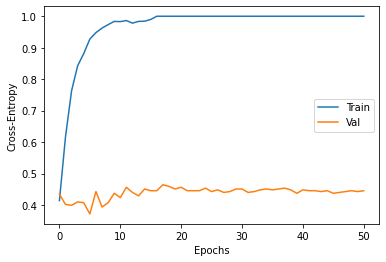

In [138]:
history = DROPOUT_model.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

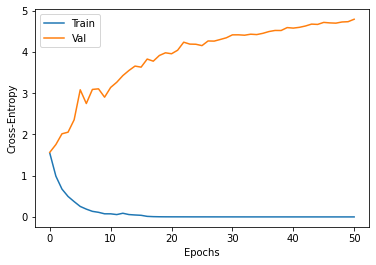

In [140]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

Some comparison

In [141]:

from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h1')
best_L2_model = load_model('best_model_L2.h1')
best_DROPOUT_model = load_model('best_model_DROPOUT.h1')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

20/20 [==============================] - 0s 764us/step - loss: 1.4879 - accuracy: 0.4519
Loss 1.544006, Accuracy 0.426282
Loss 1.967393, Accuracy 0.418269
Loss 1.487939, Accuracy 0.451923


In [ ]:
#TO ASK

"""

Come si evince sopra tutti i modelli sono spudoratamente in oevrfitting, ho provatoi diverse tecniche di regolarizzazione ma senza successo, come si potrebbe procedere?
Ai fini del report potrei cancellare i record della classe 6=sad dal train e test set e fare classificazione senza queste istanze?
Ai fini del report ha senso, oltre ai vari classification report, mostrare anche le roc curve di questi pessimi modelli?
Quali grafici sarebbe opportuno plottare a fini di una classificazione multiclasse? (per ora abbiamo pensato a : confusion matrix , a Roc curve che plotta una macro media delle 8 classi, ha senso plottare anche il decision boundary di ciascun metodo ?  )
Si è provato anche a fare sampling + dim red. + cancellazione outliers(21) per il train per allenare i modelli ma ho incrmentanto le performance in media dell 1% acc,f1


"""

